## k-Means clustering 
1. (Unsuperied Machine Learning - No target Feature is available)
2. Main Goal in clustering : Categorize similar datapoints togethor


### Install yellowbricks package for elbow plot

In [1]:
%pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [3]:
import pandas as pd 
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Problem Statement - Clategorize similar customers togethor on basis of Income and Spending Score

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']

In [7]:
df.head()


,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Visualize scatterplot for Income vs Spend

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

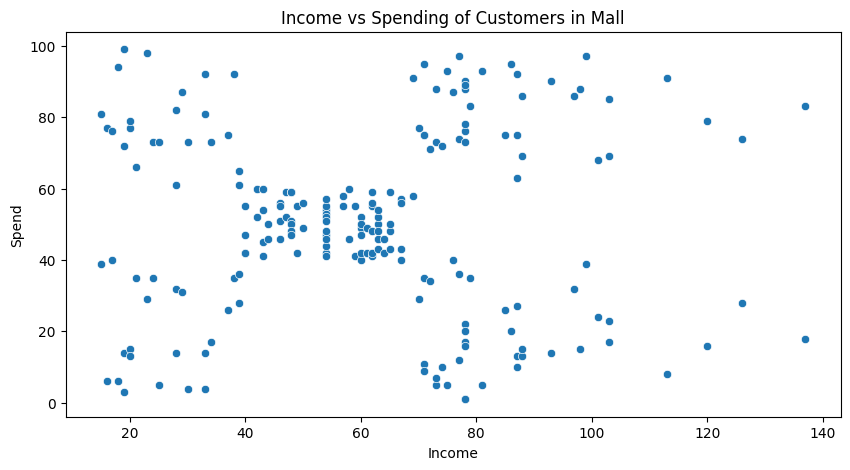

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Income vs Spending of Customers in Mall')
plt.show()

### Get the X features

In [10]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Preprocess the data for X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Get optimum number of clusters

In [17]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'distutils'